In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#twitter api req

consumer_key = 'OghYPlGodEcgozxuNVr5c5294'
consumer_secret = 'yHNzTz2WMoFvmMyUYPc5h2xqjn3Rjz1Ryc494gxf5SFwMzFG6F'
access_token = '2408033235-cChNchze46vnUMT97ECabw73MsCWAeUm7vrWslh'
access_token_secret = '3afWisufWn9u9LbMQu6v06XPbUak9DESRGnp3PF4xAZb0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#create api obj
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
#extract all tweets form the twitter user

posts = []
for tweet in tweepy.Cursor(api.user_timeline, screen_name="SteveStuWill", ).items():
    posts.append(tweet)



In [5]:
i = 1
#print tweets
print("Show the tweets:\n")
for tweet in posts:
    print(str(i) + ")" + tweet.text+"\n")
    i += 1

Show the tweets:

1)RT @SteveStuWill: Cuttlefish hypnotizes its prey with its built-in disco lights https://t.co/liCTBcKTK7 https://t.co/z8jaTCrwrX

2)RT @SteveStuWill: Like crows and other corvids, magpies are exceptionally intelligent birds, with cognitive abilities rivalling those of pr…

3)RT @squeeze_camu2: ビートルズがロックファンの一般教養だと思ってた世代には何とも奇妙な、いや感動を追体験出来る素晴らしいリアクションだな、うん☺️

@_romelife
The Beatles - A Day In The Life REACTION THE…

4)Cuttlefish hypnotizes its prey with its built-in disco lights https://t.co/liCTBcKTK7 https://t.co/z8jaTCrwrX

5)Like crows and other corvids, magpies are exceptionally intelligent birds, with cognitive abilities rivalling those… https://t.co/FgvTgjBbHy

6)RT @SteveStuWill: “Few people are capable of expressing with equanimity opinions which differ from the prejudices of their social environme…

7)RT @SteveStuWill: Stunning photograph shows a flower as an insect might see it https://t.co/vVedcmXYrG https://t.co/AlTk8bvPy7

8)“Few people are capable of exp

In [6]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove  @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

    return text

df = pd.DataFrame([tweet.text for tweet in posts], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#print
df

,Tweets
0,: Cuttlefish hypnotizes its prey with its buil...
1,": Like crows and other corvids, magpies are ex..."
2,_camu2: ビートルズがロックファンの一般教養だと思ってた世代には何とも奇妙な、いや感動...
3,Cuttlefish hypnotizes its prey with its built-...
4,"Like crows and other corvids, magpies are exce..."
...,...
3232,: Recent genome-wide association studies have ...
3233,"@_JoseGonzalez_ Thanks, José - happy to hear t..."
3234,@_JoseGonzalez_: Loved this book!! \n💫💫💫💫💫
3235,"Related: Evolutionary theory is interesting, b..."


In [7]:
keywords = ['evo', 'evolution','ape', 'overproduction', 'adaption', 'organism', 'speciation', 'variation', 'metamorphosis', 'habitat', 'ecosystem', 'ancestor', 'taxonomy', 'taconomic', 'cell', 'inheritance', 'root', 'biology', 'Darwin', 'Natural Selection', 'Origin', 'botanic', 'cholorplast', 'classification', 'clone', 'mutation', 'isolation', 'cytoplasm', 'dna', 'ecology', 'embryo', 'eukaryotic', 'rna', 'fauna', 'flora', 'fetus', 'fossil', 'fungi', 'gene', 'genetic', 'genome', 'dinosour']
evoRTweets = []
i = 0

count = 0
for tweet in df['Tweets']:
    if any(keyword in tweet for keyword in keywords):
        evoRTweets.append(tweet)
        count+=1
    i+=1

dfEvo = pd.DataFrame([item for item in evoRTweets], columns=['Tweets'])

dfEvo


,Tweets
0,: Thought-provoking &amp; methodologically inn...
1,: ... no single individual was the originator ...
2,"Related. 👇 Note that, unlike the study below, ..."
3,: لماذا نشعر بالغيرة !؟\n\nيطرح عالم النفس الت...
4,: What is the function of fear?\nR: Fear motiv...
...,...
442,Sarychev volcano eruption as seen from the Int...
443,An evolutionary perspective on mental disorders
444,Lab-grown meat can be generated from animal ce...
445,Genetic correlations between mental disorders....


In [8]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#create two new colums
dfEvo['Subjectivity'] = dfEvo['Tweets'].apply(getSubjectivity)
dfEvo['Polarity'] = dfEvo['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
dfEvo


,Tweets,Subjectivity,Polarity
0,: Thought-provoking &amp; methodologically inn...,0.650000,0.450000
1,: ... no single individual was the originator ...,0.307143,0.017857
2,"Related. 👇 Note that, unlike the study below, ...",0.250000,0.000000
3,: لماذا نشعر بالغيرة !؟\n\nيطرح عالم النفس الت...,0.000000,0.000000
4,: What is the function of fear?\nR: Fear motiv...,0.000000,0.000000
...,...,...,...
442,Sarychev volcano eruption as seen from the Int...,0.000000,0.000000
443,An evolutionary perspective on mental disorders,0.200000,-0.100000
444,Lab-grown meat can be generated from animal ce...,0.066667,-0.166667
445,Genetic correlations between mental disorders....,0.350000,0.200000


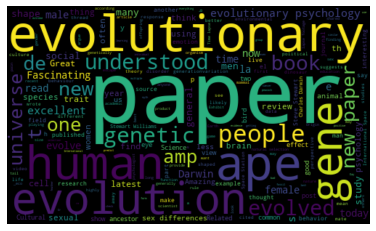

In [9]:
# plot the word cloud

allWords = ' '.join([twts for twts in dfEvo['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfEvo['Analysis'] = dfEvo['Polarity'].apply(getAnalysis)

#show dataframe
dfEvo

,Tweets,Subjectivity,Polarity,Analysis
0,: Thought-provoking &amp; methodologically inn...,0.650000,0.450000,Positive
1,: ... no single individual was the originator ...,0.307143,0.017857,Positive
2,"Related. 👇 Note that, unlike the study below, ...",0.250000,0.000000,Neutral
3,: لماذا نشعر بالغيرة !؟\n\nيطرح عالم النفس الت...,0.000000,0.000000,Neutral
4,: What is the function of fear?\nR: Fear motiv...,0.000000,0.000000,Neutral
...,...,...,...,...
442,Sarychev volcano eruption as seen from the Int...,0.000000,0.000000,Neutral
443,An evolutionary perspective on mental disorders,0.200000,-0.100000,Negative
444,Lab-grown meat can be generated from animal ce...,0.066667,-0.166667,Negative
445,Genetic correlations between mental disorders....,0.350000,0.200000,Positive


In [11]:
#get the percentage of positive tweets
ptweets = dfEvo[dfEvo.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / dfEvo.shape[0])* 100, 1) 

57.5

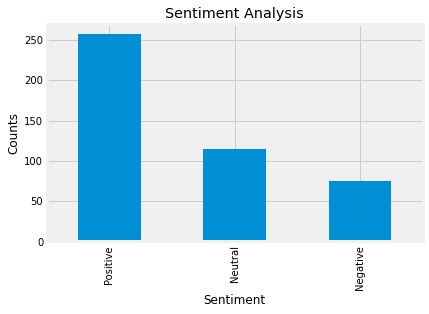

In [12]:
#show the value counts

dfEvo['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfEvo['Analysis'].value_counts().plot(kind='bar')
plt.show()